In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [27]:
fake = pd.read_csv(r"C:\Users\heman\Downloads\Fake.csv\Fake.csv")
true = pd.read_csv(r"C:\Users\heman\Downloads\True.csv\True.csv")

In [28]:
fake.shape

(23481, 4)

In [29]:
true.shape

(21417, 4)

In [30]:
fake['target'] = 'fake'
true['target'] = 'true'

In [31]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [32]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [33]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [34]:
data.head(5)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [35]:
data.tail(5)

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [36]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [37]:
data.head()

,title,text,subject,date,target
0,WATCH: Jake Tapper CRUSHES Kellyanne Conway F...,Kellyanne Conway is a complete hypocrite who h...,News,"December 4, 2016",fake
1,Immigration provision cut from Obamacare rollb...,WASHINGTON (Reuters) - Some conservatives in W...,politicsNews,"March 21, 2017",true
2,Turkish judge finds 42 soldiers guilty of tryi...,"MUGLA, Turkey (Reuters) - A Turkish court on W...",worldnews,"October 4, 2017",true
3,"Republican Trashes Senate’s Health Care Bill,...",The Senate Republicans have attracted loads of...,News,"June 21, 2017",fake
4,LEFTIST STORE OWNER Makes Video Asking Libs To...,Things didn t go as well as Nicholle had hoped...,politics,"Oct 6, 2017",fake


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [39]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,WATCH: Jake Tapper CRUSHES Kellyanne Conway F...,Kellyanne Conway is a complete hypocrite who h...,News,fake
1,Immigration provision cut from Obamacare rollb...,WASHINGTON (Reuters) - Some conservatives in W...,politicsNews,true
2,Turkish judge finds 42 soldiers guilty of tryi...,"MUGLA, Turkey (Reuters) - A Turkish court on W...",worldnews,true
3,"Republican Trashes Senate’s Health Care Bill,...",The Senate Republicans have attracted loads of...,News,fake
4,LEFTIST STORE OWNER Makes Video Asking Libs To...,Things didn t go as well as Nicholle had hoped...,politics,fake


In [40]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Kellyanne Conway is a complete hypocrite who h...,News,fake
1,WASHINGTON (Reuters) - Some conservatives in W...,politicsNews,true
2,"MUGLA, Turkey (Reuters) - A Turkish court on W...",worldnews,true
3,The Senate Republicans have attracted loads of...,News,fake
4,Things didn t go as well as Nicholle had hoped...,politics,fake


In [41]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,kellyanne conway is a complete hypocrite who h...,News,fake
1,washington (reuters) - some conservatives in w...,politicsNews,true
2,"mugla, turkey (reuters) - a turkish court on w...",worldnews,true
3,the senate republicans have attracted loads of...,News,fake
4,things didn t go as well as nicholle had hoped...,politics,fake


In [42]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['text'] = data['text'].apply(punctuation_removal)

In [43]:
data.head()

,text,subject,target
0,kellyanne conway is a complete hypocrite who h...,News,fake
1,washington reuters some conservatives in wash...,politicsNews,true
2,mugla turkey reuters a turkish court on wedne...,worldnews,true
3,the senate republicans have attracted loads of...,News,fake
4,things didn t go as well as nicholle had hoped...,politics,fake


In [44]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [45]:
data.head()

,text,subject,target
0,kellyanne conway complete hypocrite soul cnn h...,News,fake
1,washington reuters conservatives washington fu...,politicsNews,true
2,mugla turkey reuters turkish court wednesday f...,worldnews,true
3,senate republicans attracted loads criticism b...,News,fake
4,things go well nicholle hoped lashing owner bi...,politics,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


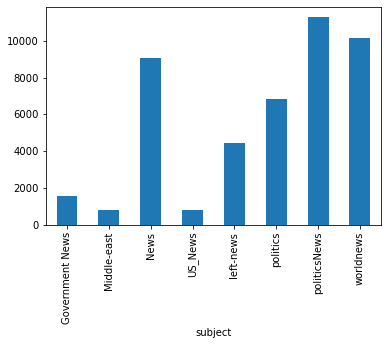

In [46]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


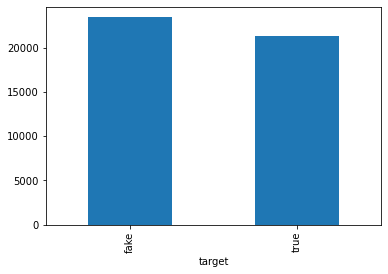

In [47]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [49]:
!pip install wordcloud

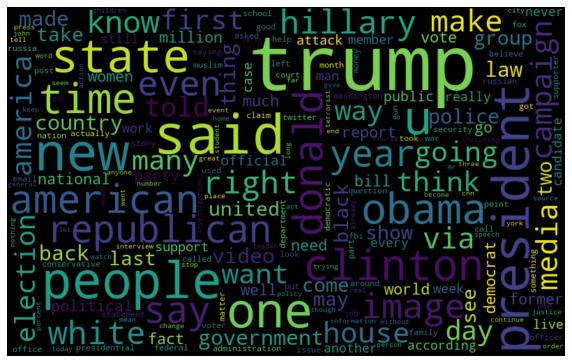

In [50]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

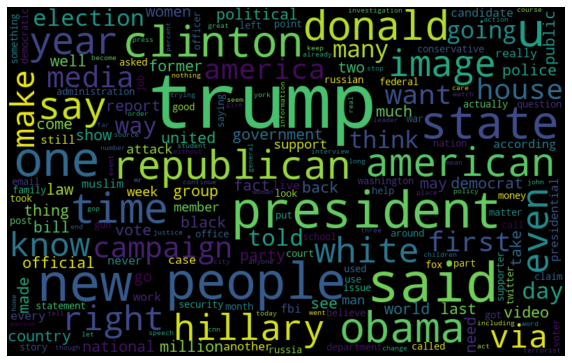

In [51]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

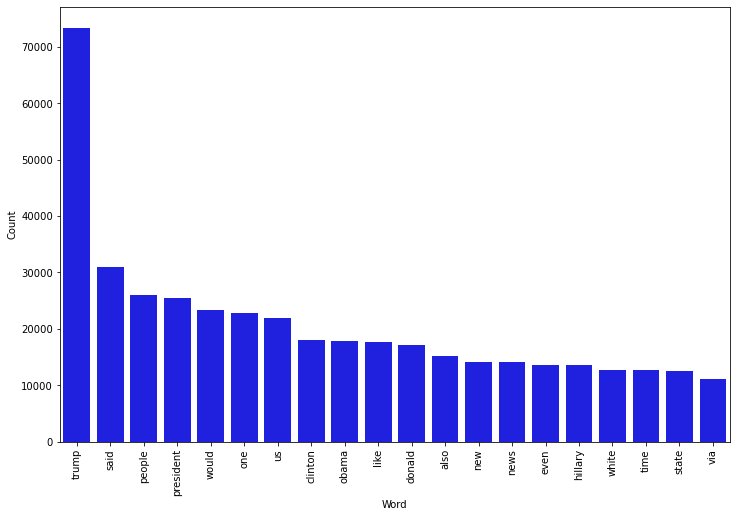

In [53]:
counter(data[data["target"] == "fake"], "text", 20)

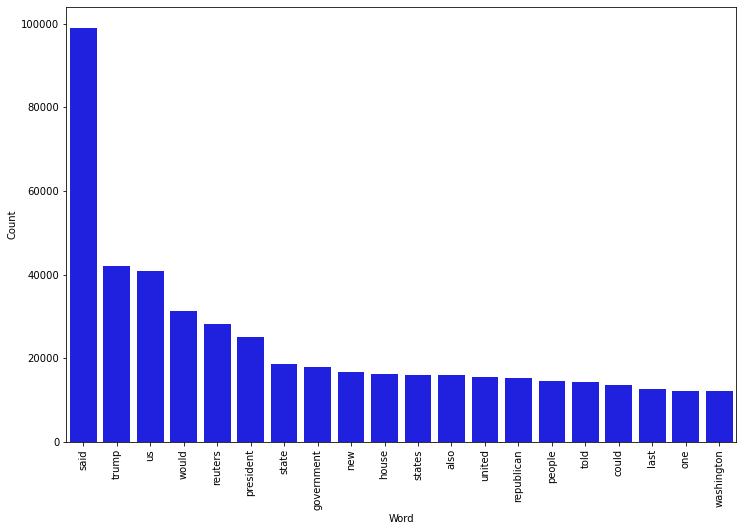

In [54]:
counter(data[data["target"] == "true"], "text", 20)

In [55]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [56]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [57]:
X_train.head()

36335    video conservative comedian steven crowder exa...
12384    diamond silk light crowd trump rally nc remind...
24419    hillary clinton revealed person would love app...
24740    washington reuters us house representatives sp...
27039    washington reuters us president barack obama a...
Name: text, dtype: object

In [58]:
y_train.head()

36335    fake
12384    fake
24419    fake
24740    true
27039    true
Name: target, dtype: object

In [59]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.54%


Confusion matrix, without normalization


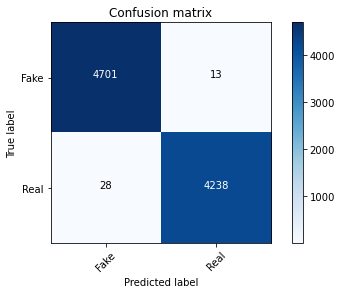

In [60]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])